# 4.9 Data Visualizations - Part 2

## Contents:
### Import libraries, set path
### Import libraries and set path¶
### Import orders_products_w_full_customer_info.pkl¶
### Histogram of orders by hour of day
### Bar chart of loyalty flag
### Line chart for expenditures by hour of day
### Line chart of age and number of dependents¶
### Scatterplot of age vs spending power (income)
# -----------------------------------

### Import libraries and set path

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Set path for use in import
path = r'C:\Users\XLT2\CFProjects\2023-04-07 Instacart Basket Analysis'

### Step 1 - Import orders_products_w_full_customer_info.pkl

In [6]:
# Import orders_products_w_full_customer_info.pkl
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_w_full_customer_info.pkl'))

In [4]:
# Confirm good import
df_ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,first_name,last_name,gender,state,age,date_joined,num_of_dependents,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [5]:
df_ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 int64   
 7   eval_set                object  
 8   order_number            int64   
 9   order_dow               int64   
 10  order_hour_of_day       int64   
 11  days_since_prior_order  float64 
 12  add_to_cart_order       int64   
 13  reordered               int64   
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days_2          object  
 17  busiest_hours           object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_spend               float64 
 21  spendi

### Step 2 - See '4.9 Data Visualizations' script

### Step 3 - Histogram of orders by hour of day

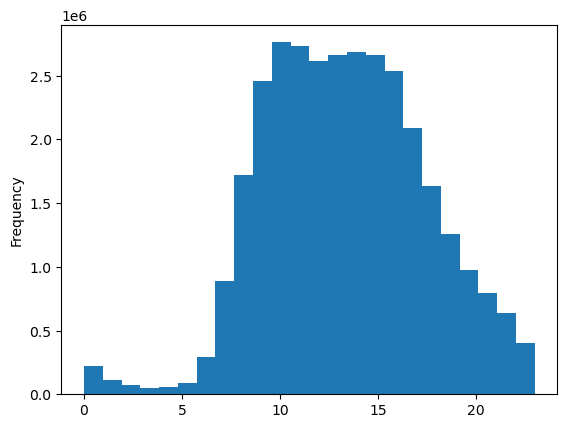

In [6]:
# Chart prices data - histogram
daily_orders_hist = df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

In [7]:
# Save histogram chart as png
daily_orders_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_hour_of_day.png'))

### The histogram indicates that orders begin at about 6am. This ramps up until its peak at about 9am. At about 4pm, the orders peak ends and begins a slow (relatively linear) decline until midnight.

### Step 4 - Bar chart of loyalty flag

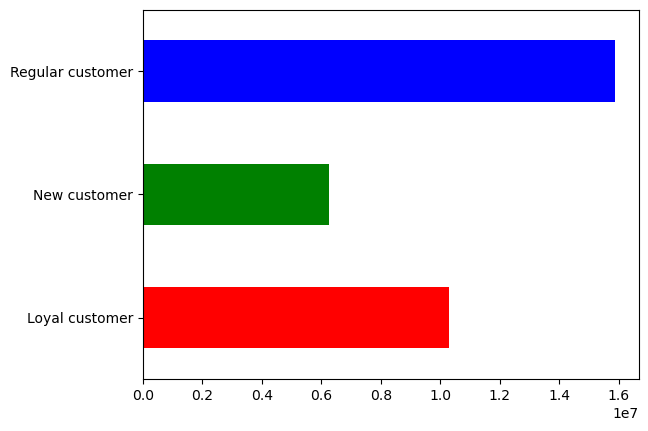

In [8]:
# Set colors and create bar chart
colors = ['red', 'green', 'blue']
loyalty_flag_bar = df_ords_prods_cust['loyalty_flag'].value_counts().sort_index().plot.barh(color = colors)

In [9]:
# Save bar chart as png
loyalty_flag_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

### Step 5 - Line chart for expenditures by hour of day

#### Prep for 70/30 sample sets of data

In [10]:
# Create set of random numbers
# Seed with constant
np.random.seed(5)

In [11]:
# New list with 70/30 split designations
df_split = np.random.rand(len(df_ords_prods_cust)) <= 0.7

In [12]:
# Confirm write to df_split
df_split

array([ True, False,  True, ...,  True, False,  True])

#### Create 70/30 dataframes

In [13]:
# Create df for 70% of records
df_large = df_ords_prods_cust[df_split]

In [14]:
# Create df for 30% of records
df_small = df_ords_prods_cust[~df_split]

In [15]:
df_large.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,first_name,last_name,gender,state,age,date_joined,num_of_dependents,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,both
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,3,...,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,both


In [16]:
df_small.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,first_name,last_name,gender,state,age,date_joined,num_of_dependents,marital_status,income,_merge
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,...,NotProvided,Parks,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both
11,1,Chocolate Sandwich Cookies,61,19,5.8,497193,1480,prior,36,3,...,Randy,Franklin,Male,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both
14,1,Chocolate Sandwich Cookies,61,19,5.8,3171753,1494,prior,6,3,...,Kathryn,Hull,Female,Indiana,78,6/29/2017,1,married,49504,both


#### Confirm all records accounted for

In [17]:
# Confirm full table
len(df_ords_prods_cust)

32404859

In [18]:
# Confirm sum of two 70/30 tables
len(df_large) + len(df_small)

32404859

#### Plot line chart

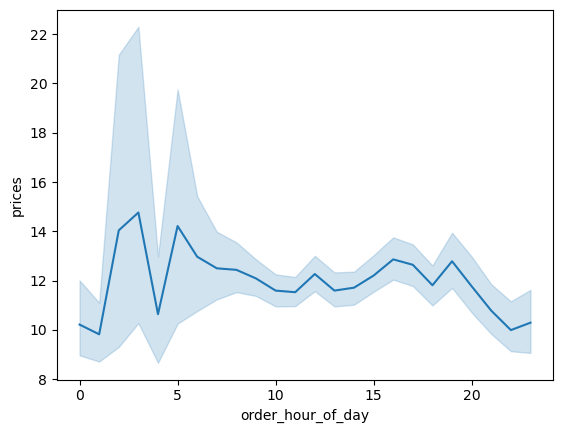

In [19]:
expenditure_line = sns.lineplot(data = df_large, x = 'order_hour_of_day', y = 'prices')

In [20]:
# Save line chart as png
expenditure_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_expenditures_hour_of_day.png'))

### Step 6 - Line chart of age and number of dependents

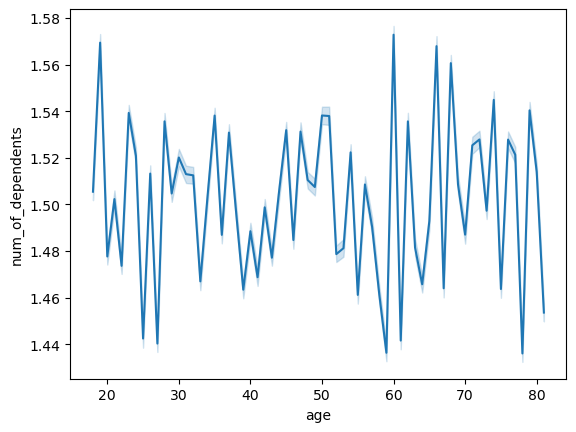

In [21]:
age_fam_line = sns.lineplot(data = df_large, x = 'age', y = 'num_of_dependents')

#### As a comparison between age and number of dependents, this shows an extremely varied number of dependents for all ages. The range stays within the 1.44 to 1.58 count.

In [22]:
# Save line chart as png
age_fam_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_vs_num_of_dependents.png'))

### Step 7 - Scatterplot of age vs spending power (income)

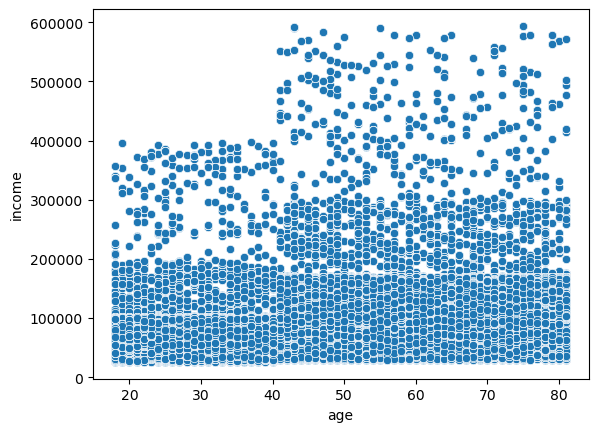

In [23]:
# Chart age vs spending - Scatterplot
scatter_age_vs_income = sns.scatterplot(x = 'age', y = 'income', data = df_ords_prods_cust)

#### We can see that 200k seems to be the general upper limit in most income. Under 40 has a select number of people that significantly exceed this maxing at 400k. For the over 40 age, we can see another set of incomes from 200k to 300k and this is relatively consistent through all over 40. This age group then also shows a smaller selection of people with income over 300k maxed at about 600k.

In [24]:
# Save scatter as png
scatter_age_vs_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_vs_income.png'))